# (1주차) 9월6일 
> CNN을 활용한 이미지 자료분석 

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

### 강의영상 

> youtube: https://youtube.com/playlist?list=PLQqh36zP38-w4djJcMLe2Jgfuj5V14NPi

### Import

In [38]:
# 이미지 분류 module import
from fastai.vision.all import * 

### 데이터저장

In [39]:
path = untar_data(URLs.PETS)/'images'
# URLs.PETS: 스트링 -> 주소가 저장되어 있음 -> 주소로 들어가보니 어떠한 압축파일이 자동으로 다운 받아짐, 이게 데이터 
# untar_data: (1) URLs.PETS에 저장된 주소로 찾아가서 (2) 압축을 풀어서 (3) 어떠한 폴더에 저장, 그 폴더의 위치는 path 에 저장 

In [40]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz'

In [41]:
untar_data(URLs.PETS)

Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet')

In [42]:
path 
# 여기에 그림이 있다는 말이지?? 
# 그림이 저장되어 있는 폴더의 주소

Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images')

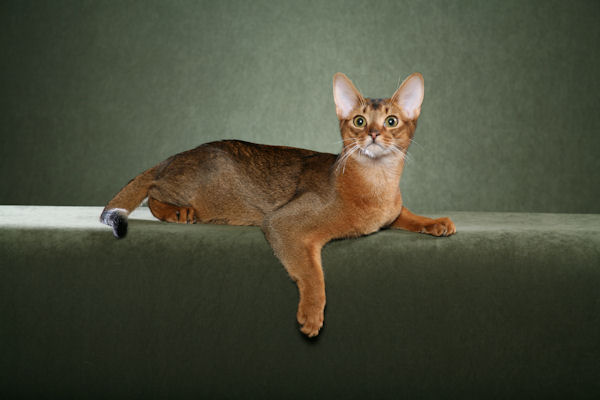

In [43]:
PILImage.create('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg')

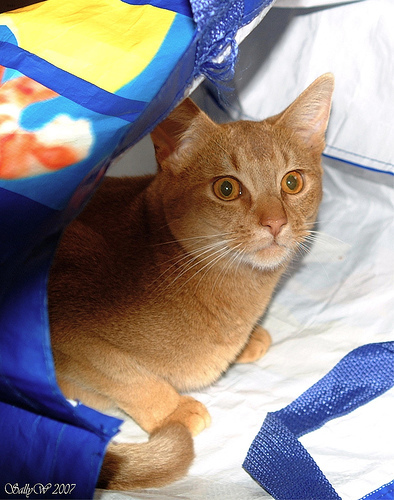

In [45]:
# Abyssinian_100.jpg 를 보고싶다면? 
PILImage.create('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg')

`-` 그림을 확인 할 수 있는건 좋은데 이렇게 확인하니까 조금 귀찮음.. 

In [52]:
_lst = ['/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg',\
        '/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg']
# 두 사진의 폴더 주소를 str으로 저장하여 list안에 넣어주었음

In [53]:
_lst[0]

'/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'

In [54]:
_lst[1]

'/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'

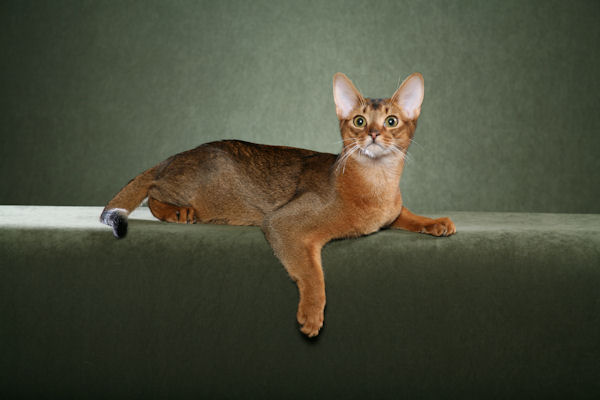

In [55]:
PILImage.create(_lst[0])

In [59]:
path

Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images')

- path에 저장된 주소에서 이미지 파일의 주소만 추출하는 함수
  - get_image_files

In [64]:
files= get_image_files(path)
files

(#7390) [Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/pug_52.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/basset_hound_112.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Siamese_193.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/shiba_inu_122.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Siamese_53.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Birman_167.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/leonberger_6.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Siamese_47.jpg'),Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/shiba_inu_136.jpg')...]

In [65]:
files[0]

Path('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg')

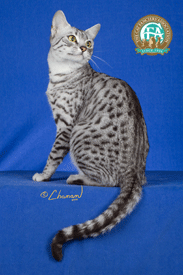

In [76]:
#PILImage.create('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/english_setter_59.jpg') : 아래와 동일한 코드
PILImage.create(files[0])

- 특징 1 
  - 대문자이면 고양이, 소문자이면 강아지그림
- 특징 2
  - 이미지크기가 서로 다르다.
    - 모델 학습을 통해 이미지 분류를 용이하게 하기 위해선 이미지 크기 통일이 필요해보임

In [77]:
def label_func(fname):
    if fname[0].isupper():
        return 'cat'
    else:
        return 'dog'

In [79]:
dls = ImageDataLoaders.from_name_func(path,files,label_func,item_tfms=Resize(224))
# path 경로에서
# files 에 해당하는 파일들을 불러와서 X를 만들고 
# item_tfms 에 정의된 방식으로 X를 변환하여 저장한다. 그리고 
# label_func: "파일이름" -> "라벨", 에 저장된 함수내용을 바탕으로 y를 만들어 저장한다. 
# 이 모든것이 저장된 자료는 변수 dls에 저장한다. 

- 이때 dls는 object

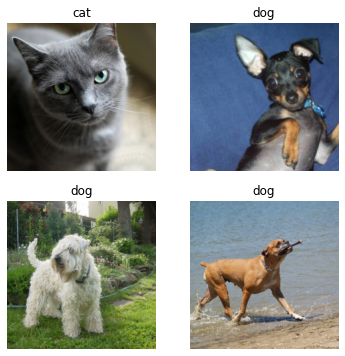

In [83]:
dls.show_batch(max_n=4)

### 학습 시켜보자

In [85]:
# 우리의 1차 목표: 이미지 -> 개/고양이 판단하는 모형(resnet34)을 채용하고, 그 모형에 데이터를 넣어서 학습하고, 그 모형의 결과를 판단하고 싶다. (즉 classifier를 만든다는 소리)
# 우리의 2차 목표: 그 모형에 "새로운" 자료를 전달하여 이미지를 분류할 것이다. (즉 classifier를 사용해보겠다)

# cnn_learner 라는 함수를 이용해서 1차목표와 2차목표를 달성할 "썸띵(Object)"을 만들것임. 
# 오브젝트란? 정보와 함수를 동시에 가지는 어떠한 집합체 
# 오브젝트.명사이름 : 이것 통채로 하나의 변수처럼 쓸 수 있음. 
# 오브젝트.동사이름 : 이것 통채로 하나의 함수처럼 쓸 수 있음. (이때 함수의 첫번째 입력은 명시하지 않아도 오브젝트 그 자체가 된다)

## clafr에 필요한 명사(=정보) <- 우리가 넣어줘야하는 것들이 대부분
# (1) 모델정보: classifier로 무엇을 뽑을것인가 (유명한 모델이 무엇인가? 잘 맞추는 모델이 무엇인가)
# (2) 데이터: 데이터를 줘야함 
# (3) 평가기준표: 채점을 할 지표 
## clafr에 필요한 동사(=함수) <- 이미 구현이 되어있음 
# (1) 학습 
# (2) 결과를 판단
# (3) 예측 

clsfr = cnn_learner(dls,resnet34,metrics=error_rate)
# clsfr 라는 오브젝트를 만들건데.. 
# 그 오브젝트의 재료로 dls (데이터), resnet34 (데이터를 분석할 모형이름), metrics (모형의 성능을 평가할 기준) 를 넣음. 

In [25]:
clsfr.fine_tune(1) # 학습을 하는 함수

epoch,train_loss,valid_loss,error_rate,time
0,0.137038,0.022387,0.006089,00:55


epoch,train_loss,valid_loss,error_rate,time
0,0.083019,0.023682,0.005413,00:53


### 기존 데이터를 잘 맞추는지 확인

In [28]:
files[7] # 강아지라고 맞춰야 함

Path('/root/.fastai/data/oxford-iiit-pet/images/pug_31.jpg')

In [29]:
clsfr.predict(files[7])

('dog', TensorBase(1), TensorBase([8.5275e-09, 1.0000e+00]))

- 학습 결과를 보여주는 메서드

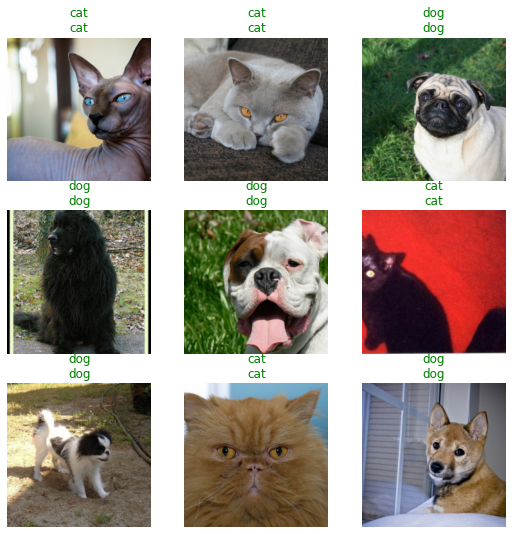

In [30]:
clsfr.show_results(max_n=4, shuffle=False)

### 오답분석

In [31]:
interpreter = Interpretation.from_learner(clsfr) # 오답을 분석하는 object를 만듦.. 재료는 클래시파이어! 

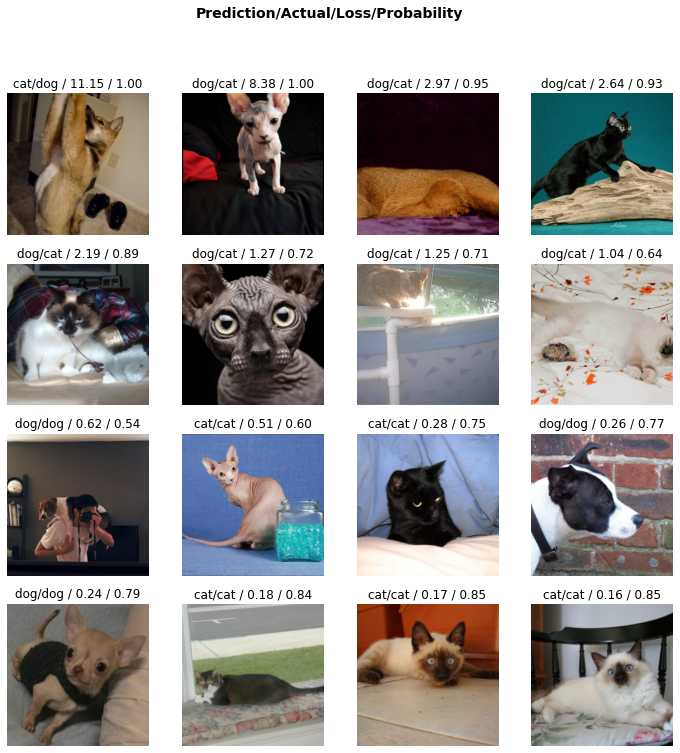

In [32]:
interpreter.plot_top_losses(16) # 가장 오류가 높은 이미지들을 정렬하여 보여주는 메서드

### 진짜 잘되는게 맞는건가? 

In [33]:
clsfr.predict(files[7])

('dog', TensorBase(1), TensorBase([8.5275e-09, 1.0000e+00]))

In [34]:
clsfr.predict('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_34.jpg')

('cat', TensorBase(0), TensorBase([1.0000e+00, 1.3439e-10]))

In [35]:
clsfr.predict(PILImage.create('/Users/gwagdoseong/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_34.jpg'))

('cat', TensorBase(0), TensorBase([1.0000e+00, 1.3439e-10]))

# $\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star$

### clsfr에 이미지파일의 주소를 넣어줘도 되고, PILImage.creat로 생성한 이미지 자체를 넣어줘도 무방!

# $\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star\star$

---

---

---

### 숙제 

`-` 인터넷에 존재하는 개 혹은 고양이 이미지를 임의로 하나 불러온뒤 clsfr에 넣어보고 결과를 관찰하라. 관찰결과를 스크린샷하여 제출하라. 
- 숙제를 위한 예시코드 
```python
# https://dimg.donga.com/ugc/CDB/SHINDONGA/Article/5e/0d/9f/01/5e0d9f011a9ad2738de6.jpg <-- 인터넷의 이미지 주소
img=PILImage.create(requests.get('https://dimg.donga.com/ugc/CDB/SHINDONGA/Article/5e/0d/9f/01/5e0d9f011a9ad2738de6.jpg').content)
clsfr.predict(img)
```

In [40]:
img=PILImage.create(requests.get('http://image.dongascience.com/Photo/2022/06/6982fdc1054c503af88bdefeeb7c8fa8.jpg').content)
clsfr.predict(img)

('dog', TensorBase(1), TensorBase([7.3712e-06, 9.9999e-01]))